<a href="https://colab.research.google.com/github/ldsAS/Tibame-AI-Learning/blob/main/Tibame20250623_AutoML_%E5%BB%BA%E7%AB%8B%E6%A8%A1%E5%9E%8B(HousePrice)_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Clement Chen</br>
E-Mail: clement1972@gmail.com</br>
https://sites.google.com/site/clement1972/</br>

# 參數設定

### <font color='red'>請修改下面的參數</font>

In [ ]:
# eval_metric 評估指標
# options for classification:
#  ['accuracy', 'balanced_accuracy', 'f1', 'f1_macro', 'f1_micro', 'f1_weighted',
#  'roc_auc', 'roc_auc_ovo_macro', 'average_precision', 'precision', 'precision_macro',
#  'precision_micro', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro',
# 'recall_weighted', 'log_loss', 'pac_score']
#
# Options for regression:
#  ['root_mean_squared_error', 'mean_squared_error', 'mean_absolute_error',
#  'median_absolute_error', 'mean_absolute_percentage_error','r2']
eval_metric = 'r2'

# data_filename 訓練用資料的檔名
data_filename = '/dataset/HousePrice_train.csv'

# prediction_filename 模型預測結果的檔名
prediction_filename = '/output/HousePrice_train_prediction.csv'

# model_path 模型儲存資料夾
model_path = '/output/model_HousePrice'

# leaderboard_filename 模型評比結果檔名
leaderboard_filename = '/output/leaderboard_HousePrice.csv'

In [ ]:
import pandas as pd
data = pd.read_csv('../content/drive/MyDrive/dataset/HousePrice_train.csv')
print(data.columns)
print(data.shape)
print(data.head())
print(data.describe())

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
# input_field 模型輸入的欄位名稱
input_field = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']

# target_field 模型預測欄位名稱
target_field = 'SalePrice'

### 環境設定

In [ ]:
# 檢查執行環境是不是Colab
# 若在本地端環境，建議建立新的venv環境來蹄autogluon
environment_type = 1
environment_base_folder = ''
if environment_type == 1:
    from google.colab import drive
    drive.mount('/content/drive') # 此處需要登入google帳號
    environment_base_folder = '/content/drive/MyDrive'
    ! pip install autogluon
    ! sudo apt-get install python3-dev graphviz libgraphviz-dev pkg-config
    ! pip install pygraphviz

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pkg-config is already the newest version (0.29.2-1ubuntu3).
python3-dev is already the newest version (3.10.6-1~22.04.1).
graphviz is already the newest version (2.42.2-6ubuntu0.1).
libgraphviz-dev is already the newest version (2.42.2-6ubuntu0.1).
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


### 載入資料

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv(environment_base_folder+data_filename)
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,255,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,145000
1,1067,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,178000
2,639,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal,85000
3,800,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,175000
4,381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,127000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,1096,20,RL,78.0,9317,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,176432
1164,1131,50,RL,65.0,7804,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,12,2009,WD,Normal,135000
1165,1295,20,RL,60.0,8172,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,115000
1166,861,50,RL,55.0,7642,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,189950


### <font color='blue'>顯示資料表欄位名稱</font>

In [ ]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# 訓練模型

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [ ]:
working_field = input_field.copy()
working_field.append(target_field)
model = TabularPredictor(label=target_field, eval_metric=eval_metric, path=environment_base_folder+model_path).fit(train_data=data[working_field],num_bag_folds=5)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       11.18 GB / 12.67 GB (88.2%)
Disk Space Avail:   61.91 GB / 107.72 GB (57.5%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'         : Strong accuracy with fast inference s

### <font color='blue'>最佳模型名稱</font>

In [ ]:
# get_model_best()為舊語法，現在可從leaderboard看
# model.get_model_best()

### <font color='blue'>預測問題種類</font>

In [ ]:
model.problem_type

'regression'

### <font color='blue'>評估指標</font>

In [ ]:
model.eval_metric

r2

### <font color='blue'>使用的演算法</font>

In [ ]:
# get_model_names() is outdated, refer to the leaderboard instead
# model.get_model_names()

### <font color='blue'>leaderboard</font>

In [ ]:
leaderboard = model.leaderboard(extra_info=True, silent=True)
leaderboard.to_csv(environment_base_folder+leaderboard_filename)
model.leaderboard(silent=True)

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you t

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.898193,r2,1.807617,1692.045710,0.001313,0.224413,2,True,12
1,LightGBMXT_BAG_L1,0.891258,r2,0.671055,47.817049,0.671055,47.817049,1,True,3
2,CatBoost_BAG_L1,0.882773,r2,0.281186,1469.299123,0.281186,1469.299123,1,True,6
3,LightGBM_BAG_L1,0.877087,r2,0.483293,47.028584,0.483293,47.028584,1,True,4
4,NeuralNetTorch_BAG_L1,0.876907,r2,0.370772,127.676541,0.370772,127.676541,1,True,10
5,XGBoost_BAG_L1,0.849199,r2,0.322712,44.449505,0.322712,44.449505,1,True,9
6,RandomForestMSE_BAG_L1,0.848142,r2,0.189214,10.269549,0.189214,10.269549,1,True,5
7,ExtraTreesMSE_BAG_L1,0.842772,r2,0.200050,4.245016,0.200050,4.245016,1,True,7
8,LightGBMLarge_BAG_L1,0.837578,r2,0.405949,47.740976,0.405949,47.740976,1,True,11
9,NeuralNetFastAI_BAG_L1,0.823630,r2,0.402663,55.954596,0.402663,55.954596,1,True,8


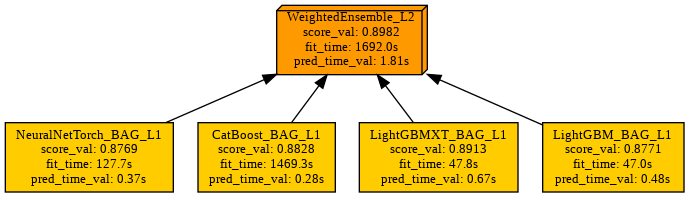

In [ ]:
if environment_type == 1:
  path_to_png = model.plot_ensemble_model()
  from IPython.display import Image, display
  display(Image(filename=path_to_png))

# 輸出預測結果

In [ ]:
if (model.problem_type != 'regression'):
  prediction_p = model.predict_proba(data)
prediction = model.predict(data)

In [ ]:
pred_data = data.copy()
pred_data['預測結果'] = prediction
# pred_data = pd.concat([pred_data,prediction_p], axis=1, join='inner') # Removed concatenation of prediction_p
pred_data.to_csv(environment_base_folder+prediction_filename)

# 儲存模型

In [ ]:
import pickle

result = {}
result['input_field'] = input_field
result['target_field'] = target_field

with open(environment_base_folder+model_path+'/used_field.bin', 'wb') as handle:
    pickle.dump(result, handle)

In [ ]:
model.save()

TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/drive/MyDrive/output/model_HousePrice")


# 欄位重要性

In [ ]:
model.feature_importance(data)

These features in provided data are not utilized by the predictor and will be ignored: ['Id']
Computing feature importance via permutation shuffling for 79 features using 1168 rows with 5 shuffle sets...
	4609.95s	= Expected runtime (921.99s per shuffle set)
	1918.52s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
OverallQual,9.302268e-02,3.266470e-03,1.821490e-07,5,0.099748,0.086297
GrLivArea,7.320642e-02,1.877787e-03,5.190254e-08,5,0.077073,0.069340
Neighborhood,2.841585e-02,7.936480e-04,7.294559e-08,5,0.030050,0.026782
TotalBsmtSF,2.607951e-02,7.849817e-04,9.837781e-08,5,0.027696,0.024463
BsmtFinSF1,2.021755e-02,7.890623e-04,2.778630e-07,5,0.021842,0.018593
...,...,...,...,...,...,...
Heating,7.019043e-05,1.858086e-05,5.380294e-04,5,0.000108,0.000032
Electrical,6.464720e-05,4.088952e-05,1.205791e-02,5,0.000149,-0.000020
MiscFeature,2.068281e-05,6.662269e-06,1.130880e-03,5,0.000034,0.000007
Utilities,1.835823e-06,1.423041e-07,4.297904e-06,5,0.000002,0.000002
